<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Task5_%E4%BD%9C%E8%80%85%E4%BF%A1%E6%81%AF%E5%85%B3%E8%81%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 任务说明
+ 任务主题：作者关联（数据建模任务），对论文作者关系进行建模，统计最常出现的作者关系；
+ 任务内容：构建作者关系图，挖掘作者关系
+ 任务成果：论文作者知识图谱、图关系挖掘

## 数据处理步骤
将作者列表进行处理，并完成统计。具体步骤如下：
+ 将论文第一作者与其他作者（论文非第一作者）构建图；
+ 使用图算法统计图中作者与其他作者的联系；

## 社交网络分析
图是复杂网络研究中的一个重要概念。Graph是用点和线来刻画离散事物集合中的每对事物间以某种方式相联系的数学模型。Graph在现实世界中随处可见，如交通运输图、旅游图、流程图等。利用图可以描述现实生活中的许多事物，如用点可以表示交叉口，点之间的连线表示路径，这样就可以轻而易举的描绘出一个交通运输网络。

## 图类型
+ 无向图，忽略了两节点间边的方向。
+ 指有向图，考虑了边的有向性。
+ 多重无向图，即两个结点之间的边数多于一条，又允许顶点通过同一条边和自己关联。

## 图统计指标
+ 度：是指和该节点相关联的边的条数，又称关联度。对于有向图，节点的入度 是指进入该节点的边的条数；节点的出度是指从该节点出发的边的条数；
+ 迪杰斯特拉路径：.从一个源点到其它各点的最短路径，可使用迪杰斯特拉算法来求最短路径；
+ 连通图：在一个无向图 G 中，若从顶点i到顶点j有路径相连，则称i和j是连通的。如果 G 是有向图，那么连接i和j的路径中所有的边都必须同向。如果图中任意两点都是连通的，那么图被称作连通图。如果此图是有向图，则称为强连通图。

加载数据集

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/') #挂载google drive 加载数据集

Mounted at /content/gdrive/


In [2]:
!cp -f  /content/gdrive/MyDrive/Colab\ Notebooks/arxiv.zip  /content/

In [3]:
!unzip -o /content/arxiv.zip  #解压数据集

Archive:  /content/arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [5]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [6]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors','authors_parsed','update_date','categories'])

筛选出2019年后，CV领域的数据

In [7]:
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，
data = data[data["year"] >= 2019] #找出 year 中2019年以后的数据，并将其他数据删除

In [8]:
data.head()

,id,authors,authors_parsed,categories,year
296,0704.0297,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...","[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...",astro-ph,2019
341,0704.0342,B. Dugmore and PP. Ntumba,"[[Dugmore, B., ], [Ntumba, PP., ]]",math.AT,2019
359,0704.0360,T.V. Zaqarashvili and K Murawski,"[[Zaqarashvili, T. V., ], [Murawski, K, ]]",astro-ph,2019
524,0704.0525,"Sezgin Aygun, Ismail Tarhan, Husnu Baysal","[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...",gr-qc,2019
534,0704.0535,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...","[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...",astro-ph,2019


In [9]:
data = data[data['categories'].apply(lambda x : 'cs.CV' in x)] # 选择类别为cs.CV下面的论文

In [10]:
data.head()

,id,authors,authors_parsed,categories,year
48709,0802.1412,Mahesh Pal,"[[Pal, Mahesh, ]]",cs.NE cs.CV,2019
122831,0905.1235,"Serguei A. Mokhov, Stephen Sinclair, Ian Cl\'e...","[[Mokhov, Serguei A., , for the MARF R&D Group...",cs.SD cs.CL cs.CV cs.MM cs.NE,2019
274867,1107.2875,"Chris Aholt, Bernd Sturmfels, Rekha Thomas","[[Aholt, Chris, ], [Sturmfels, Bernd, ], [Thom...",math.AG cs.CV,2019
288218,1109.3850,Dae-Woong Lee,"[[Lee, Dae-Woong, ]]",cs.CV,2020
292514,1110.1208,"Aman Chadha, Divya Jyoti, M. Mani Roja","[[Chadha, Aman, ], [Jyoti, Divya, ], [Roja, M....",cs.CV cs.CR cs.IT cs.MM eess.IV math.IT,2020


创建作者链接的无向图：

In [13]:
import networkx as nx 
# 创建无向图
plt.figure(figsize=(10, 6))
G = nx.Graph()
# 只用五篇论文进行构建
for row in data.iloc[:5].itertuples():
  authors = row[3]
  authors = [' '.join(x[:-1]) for x in authors]
  # 第一个作者 与 其他作者链接
  for author in authors[1:]:
    G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

<Figure size 720x432 with 0 Axes>

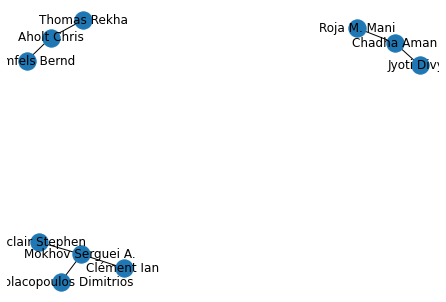

In [18]:
# 将作者关系图进行绘制：
nx.draw(G, with_labels=True)

In [19]:
try:
    print(nx.dijkstra_path(G, 'Chadha Aman', 'Jyoti Divya'))  # 求最短路径
except:
    print('No path')

['Chadha Aman', 'Jyoti Divya']


In [20]:
try:
    print(nx.dijkstra_path(G, 'Roja M. Mani', 'Jyoti Divya'))  # 求最短路径
except:
    print('No path')

['Roja M. Mani', 'Chadha Aman', 'Jyoti Divya']


如果我们1000片论文构建图，则可以得到更加完整作者关系，并选择最大联通子图进行绘制，折线图为子图节点度值。

In [21]:
G1 = nx.Graph()

for row in data.iloc[:1000].itertuples():
    authors = row[3]
    authors = [' '.join(x[:-1]) for x in authors]
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G1.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

对数图<br>
所谓对数图，实际上就是使用对数坐标绘制的图形。对于对数刻度来说，其间隔表示的是变量的值在数量级上的变化，这与线性刻度有很大的不同。对数图又分为两种不同的类型，其中一种称为双对数图，它的特点是两个坐标轴都采用对数刻度，对应的matplotlib函数是matplotlib.pyplot.loglog()。半对数图的一个坐标轴采用线性标度，另一个坐标轴使用对数刻度，它对应的matplotlib API是semilogx()函数和smilogy()函数。在双对数图上，幂律表现为直线；在半对数图上，直线则代表的是指数律。

numpy中的polyfit()函数可以用多项式来拟合数据

numpy中的polyval()函数可以用来对上面得到的多项式进行评估。

In [23]:
num_sorted = sorted(dict(G1.degree()).items(),key=lambda x :x[1],reverse=True)
for i,(name,num) in enumerate(num_sorted):
    if i <3:
        print(name,':',num)

Liu Yun : 21
Zeng Andy : 20
Fridman Lex : 17


In [28]:
def func(x):
    strs = ''
    for i in x:
        name = ' '.join(i)
        strs += name+','
    return strs

In [44]:
data_liu = data['authors_parsed'].iloc[:1000].apply(func = func)

In [45]:
data_liu = data_liu[data_liu.str.contains('Liu Yun')]

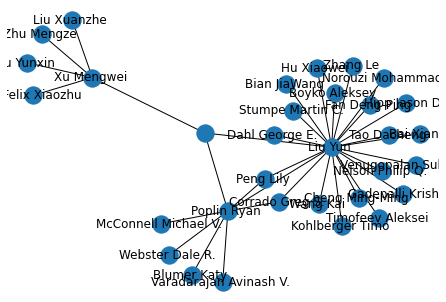

In [48]:
# 创建无向图
import networkx as nx
G2 = nx.Graph()

# 只用五篇论文进行构建
for row in data_liu.to_frame().itertuples():
    authors = row[1]
    authors = authors.split(',')
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G2.add_edge(authors[0],author) #　添加节点２，３并链接２３节点
nx.draw(G2,with_labels=True)

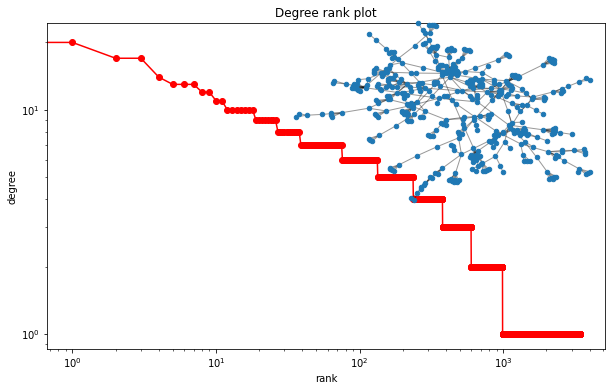

In [49]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # 节点度是与节点相邻的边数。
dmax = max(degree_sequence)

plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, "r-", marker="o") # 对数图
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0]) ## G中相连组件最多的图

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

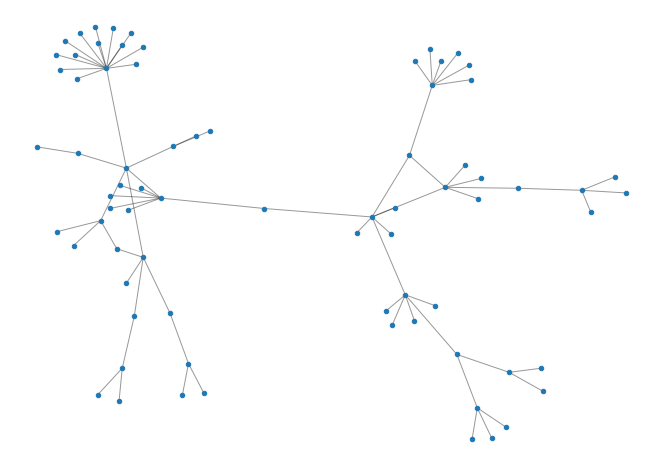

In [50]:
plt.figure(figsize=(20, 14))
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[1]) 

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

Text(0.5, 1.0, 'Number of paper authors and collaborators in the CV field')

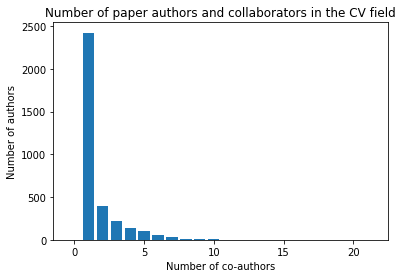

In [59]:
plt.bar(range(len(nx.degree_histogram(G1))) ,nx.degree_histogram(G1))
plt.xlabel('Number of co-authors')
plt.ylabel('Number of authors')
plt.title('Number of paper authors and collaborators in the CV field')